In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle, analysis as ana
from matplotlib.pyplot import *

In [2]:
from matplotlib import rc
rc('text', usetex=True)

In [3]:
fltr='cinv'
ytype='nilc'
mtype=0
dtype='dr2_smica'
cmask='Lmask'
form='{:.2f}'
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
s = 1e8*mb.bc**2/2/np.pi
p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
qtau, qlen, qsrc, qtbh, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)
fxtau = tools_y.init_cross(qtau,cy,p.ids,p.stag,est='')
fxtbh = tools_y.init_cross(qtbh,cy,p.ids,p.stag,est='bh-lens')
fxtBH = tools_y.init_cross(qtBH,cy,p.ids,p.stag,est='bh-lens-src')

chi: -1.3 , chi (sim): 0.0 , PTE: 0.64 (nilc,0)
chi^2: 14.8 , chi^2 (sim): 11.1 , PTE: 0.20 (nilc,0)


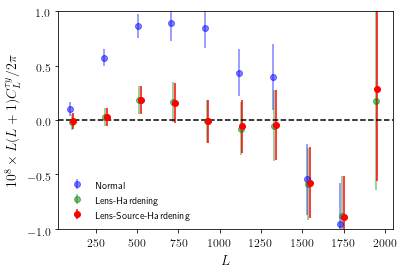

In [4]:
pl.plot_1dstyle(ymin=-1,ymax=1,ylab=r'$10^8\times L(L+1)C_L^{\tau y}/2\pi$',usetex=True,yticks=[-1.,-.5,0.,.5,1.],yticks_labsize=12,xticks_labsize=12)
for i, (xobj, Lab, co, alpha) in enumerate([(fxtau,r'Normal','b',.5),(fxtbh,r'Lens-Hardening','g',.5),(fxtBH,r'Lens-Source-Hardening','r',1.)]):
    mcb, vcb, scb, ocb = bn.binned_spec(mb,xobj.xl,cn=1)
    errorbar(mb.bc+i*10-10,s*ocb,yerr=s*vcb,fmt='o',color=co,alpha=alpha,label=Lab)
axhline(0.,color='k',ls='--')
st = ana.PTEs(ocb,scb,comment=ytype+','+str(mtype),x1pte=True)
#figtext(.2,.20,r'ymap:'+ytype+','+str(mtype))
#figtext(.2,.25,r'tau:'+dtype+','+str(cmask))
#figtext(.2,.35,r'$\chi$-PTE:'+str(form.format(st.px1)))
#figtext(.2,.30,r'$\chi^2$-PTE:'+str(form.format(st.px2)))
legend(loc=3)
#savefig('fig_tauxy_BH.pdf')
#savefig('fig_tauxy_BH.png')
show()